<a href="https://colab.research.google.com/github/mchuffman/demo-repo/blob/main/SINDy_From_Scratch_0_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implenting SINDy from "Scratch"


     This notebook is an implementation of SINDy from scratch. Its broken up into 4 major steps:

<ul>
<li>Step 0: Collect Data (X) from a Signal (S)</li>
<li>Step 1: Build $\dot{X}$</li>
<li>Step 2: Build  Θ  (function library)</li>
<li>Step 3: Solve  𝑋˙=Θ(𝑋)Ξ </li>

The dynamical system we are studying in this example are the Lorenz equations. Given a governing system, we seek to generate a signal ($S$), organize observations of the signal into an observation matrix ($X$), and then use the 3 steps of SINDy to redisover the governing laws. 

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# For Filtering
from scipy.signal import savgol_filter


## Our Dynamical System: Lorenz Equations


<!-- <ol>
<li>Item 1</li>
<li>Item 2 ( we can type 1. and the markdown will automatically numerate them) </li>
    
<li><p>First Item</p> -->
Quick overview: The Lorenz Equations are a set of (ordinary differential) equations used to describe 

Lorenz Equations:
<ul>
<li>$ \frac{\mathrm{d} x}{\mathrm{d} t} = \sigma (y - x) $</li>
<li>$\frac{\mathrm{d} y}{\mathrm{d} t} = x (\rho - z) - y$</li>
<li>$\frac{\mathrm{d} z}{\mathrm{d} t} = x y - \beta z$</li>

  The constants $\sigma$(s), $\rho$ (r), and $\beta$ (b) are system parameters proportional to the Prandtl number, Rayleigh number, and certain physical dimensions of the layer itself.
    
Ultimately, it is our goal to recover the terms and coefficients from the "signal dataset".
    
<ul>
<li>$\sigma = 10 $</li>
<li>$\rho = 28$</li>
<li>$\beta = 2.667$</li>
    


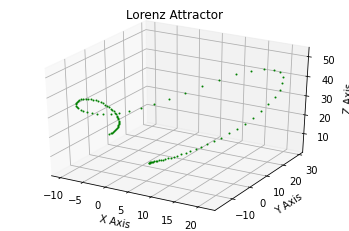

In [7]:
## Set Lorenz System Parameters ##
s=10
r=28
b=2.667
init = (s,r,b)
dt = .01
num_steps = 100

## Building a Lorenz Attractor ##
def lorenz(x, y, z, params = (10, 28, 2.667)):
    s = params[0]
    r = params[1]
    b = params[2]
    '''
    Given:
       x, y, z: a point of interest in three dimensional space
       s, r, b: parameters defining the lorenz attractor
    Returns:
       x_dot, y_dot, z_dot: values of the lorenz attractor's partial
           derivatives at the point x, y, z
    '''
    x_dot = s*(y - x)
    y_dot = r*x - y - x*z
    z_dot = x*y - b*z
    return x_dot, y_dot, z_dot

def evolve_system(system = lorenz,
                  parameters = (10, 28, 2.667),
                  num_steps = num_steps,
                  dt = dt, 
                  init = (1., 1., 1.)):
    """
    Given a chaotic system and associated parameters
    
    Returns: "developed" system
    """
    xs = np.empty(num_steps + 1)
    ys = np.empty(num_steps + 1)
    zs = np.empty(num_steps + 1)
    
    xs[0], ys[0], zs[0] = init

                  
    #HashtagNumericalIntegration. This is (forward) Euler's Method, but I'd like to provide the option for choosing how this function evolves the system
    for i in range(num_steps):
        x_dot, y_dot, z_dot = system(xs[i], ys[i], zs[i], params = parameters)
        xs[i + 1] = xs[i] + (x_dot * dt)
        ys[i + 1] = ys[i] + (y_dot * dt)
        zs[i + 1] = zs[i] + (z_dot * dt)
    return(xs, ys, zs)

                  
def plot_attractor(attractor, title = "Lorenz Attractor"):
    """
    Given: a set of coordinates (x,y,z) for a developed attractor
    Returns: 3D plot of the attractor
    """
    fig = plt.figure()
    ax = fig.gca(projection='3d')

    ax.plot(attractor[0], attractor[1], attractor[2], label = "Signal", marker = "s", markersize = .9, markerfacecolor='None', markeredgecolor='g', linestyle="-", linewidth=0)
#     ax.plot(f, color = 'k', label = "Signal",
#                 marker = "s", markersize = .9, markerfacecolor='None', markeredgecolor='g', linestyle="-", linewidth=0)
    
    ax.set_xlabel("X Axis")
    ax.set_ylabel("Y Axis")
    ax.set_zlabel("Z Axis")
    ax.set_title(title)

    plt.show()

    
attractor = evolve_system()
plot_attractor(attractor)


# Step 0: Build a "Signal" data set ($S$) and collect a data matrix of observations $X$

Default coefficients:

<ul>
<li>$\sigma = 10 $</li>
<li>$\rho = 28$</li>
<li>$\beta = 2.667$</li>



    
##### Consider your choice of the timestep ("dt") and iterations ("num_steps"). Is your choice sufficiently continuous?

<ul>
<li>dt = .005</li>
<li>num_steps = 10000</li>

In [12]:
dt = .005
num_steps = 10000

print("total experiment time:")
print(str(num_steps) + " steps ")
print(str(dt*num_steps) + " seconds)")
print("("+str(round(dt*num_steps/60,1)) + " minutes)")
print(str(1/dt) + " measurement per second")

total experiment time:
10000 steps 
50.0 seconds)
(0.8 minutes)
200.0 measurement per second


##### Develop System

total experiment time:
10000 steps 
50.0 seconds 
(0.8 minutes)
200.0 measurement per second


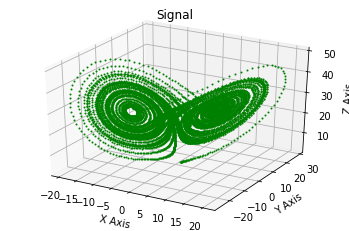

first 10 x data = 
[1.         1.         1.0065     1.01914458 1.03763997 1.06174833
 1.09128282 1.12610323 1.16611217]
 'Signal' has dim: (10001, 3)
[[1.         1.         1.        ]
 [1.         1.13       0.991665  ]
 [1.0065     1.25939167 0.98409115]
 [1.01914458 1.38905228 0.97730618]
 [1.03763997 1.51980718 0.97135203]
 [1.06174833 1.65243817 0.96628411]
 [1.09128282 1.78769099 0.96217108]
 [1.12610323 1.92628213 0.95909491]
 [1.16611217 2.06890497 0.95715134]
 [1.21125181 2.21623542 0.95645061]]


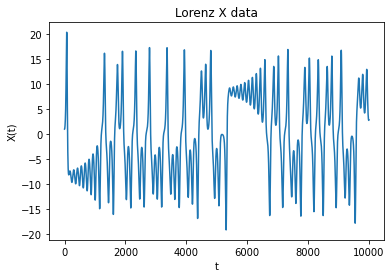

In [31]:
## Initializing Lorenz system ##
s=10
r=28
b=2.667
init = (s,r,b)
# dt = .005
# num_steps = 10000

print("total experiment time:")
print(str(num_steps) + " steps ")
print(str(dt*num_steps) + " seconds ")
print("("+str(round(dt*num_steps/60,1)) + " minutes)")
print(str(1/dt) + " measurement per second")

attractor = evolve_system(system = lorenz,
                  parameters = (10, 28, 2.667),
                  num_steps = num_steps,
                  dt = dt, 
                  init = (1., 1., 1.))
plot_attractor(attractor, title = "Signal")

print("first 10 x data = ")
print(attractor[0][0:9])

#Build "Signal" Object
S = np.array(attractor).T

print(" 'Signal' has dim: " + str(S.shape))

print(S[0:10, :])

plt.plot(S[:,0])
plt.title("Lorenz X data")
plt.ylabel("X(t)")
plt.xlabel("t")
plt.show()




##### Sample S to Build $X$

In [32]:
## Take a subsample, somewhere in the middle to avoid potential boundary condition issue

train_x = S[3:5003, 0]
train_y = S[3:5003, 1]
train_z = S[3:5003, 2]

# test_x = attractor[0][5000:]
# test_y = attractor[1][5000:]
# test_z = attractor[2][5000:]

X = np.array((train_x, train_y, train_z)).T
print("X is " + str(X.shape))

# For debugging:
# print("Top 10 entries of X:")
# print("")
# print(X[0:10, :])

X is (5000, 3)


## Step 1: Build $\dot{X} = \frac{\mathrm{d} X}{\mathrm{d} t}$
Using a numerical approximation of the data.

Currently I'm using a Savitsky-Golay filter + finite differencing.

##### SG Filter

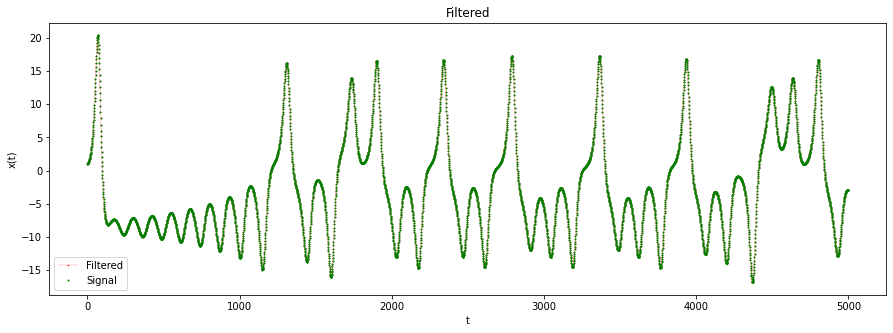

In [34]:
wl = 5 # window length
po = 2 # poly order

sg_train_x = savgol_filter(X[:,0], window_length = wl, polyorder = po)
sg_train_y = savgol_filter(X[:,1], window_length = wl, polyorder = po)
sg_train_z = savgol_filter(X[:,2], window_length = wl, polyorder = po)

# Filtered X vs Filtered Y

def plotexample1(s = train_x, f = sg_train_x, lab1 = "Signal", lab2 = "Filtered"):
    fig, ax = plt.subplots(figsize = (15,5))
    ax.plot(s,  color = 'r', label = "Filtered", 
                marker = "x", markersize = .9, markerfacecolor='None', markeredgecolor='r', linestyle="-", linewidth=.2)
    ax.plot(f, color = 'k', label = "Signal", 
                marker = "s", markersize = .9, markerfacecolor='None', markeredgecolor='g', linestyle="-", linewidth=0)
    ax.set(xlabel='t', ylabel='x(t)',title=lab2)
    ax.legend()
    
plotexample1()

##### Finite Differencing

In [35]:
fd_sg_train_x = np.diff(sg_train_x)*(1/dt)
fd_sg_train_y = np.diff(sg_train_y)*(1/dt)
fd_sg_train_z = np.diff(sg_train_z)*(1/dt)
len(fd_sg_train_x)

# Build X_dot
X_dot = np.array((fd_sg_train_x, fd_sg_train_y, fd_sg_train_z)).T

# Manually check the first 10:
# for i in range(0,10):
#     print(i)
#     print(fd_sg_train_x[i])
#     print(str((sg_train_x[i+1]-sg_train_x[i])/dt))
    

## Step 2: Build $\Theta$ (function library)

The function library I use in this step has $p = 32$ terms 

In [36]:
# Trim X to match finite differencing format
train_x_new = train_x[:-1:]
train_y_new = train_y[:-1:] 
train_z_new = train_z[:-1:] 

X_trim = np.array((train_x_new, train_y_new, train_z_new)).T
# X.shape
# X_trim
# train_x_new
# X_trim[:,0]

In [37]:
# it isn't pretty

Theta_X = np.array((
            np.ones( ( 4999,) ),                # 0
            train_x_new,                        # 1
            train_y_new,                        # 2
            train_z_new,                        # 3
            #P2  
            train_x_new**2,                     # 4
            train_x_new*train_y_new,            # 5
            train_x_new*train_z_new,            # 6
            train_y_new**2,                     # 7
            train_y_new*train_z_new,            # 8
            train_z_new**2,                     # 9
            #P3
            train_x_new**3,
            train_x_new**2*train_y_new,
            train_x_new**2*train_z_new,
            train_x_new*train_y_new*train_z_new,
            train_y_new**3,
            train_y_new**2*train_x_new,
            train_y_new**2*train_z_new,
            train_z_new**3,
            train_z_new**2*train_x_new,
            train_z_new**2*train_y_new,
            #Trig
            np.sin(train_x_new),
            np.sin(train_y_new),
            np.sin(train_z_new),
            np.cos(train_x_new),
            np.cos(train_y_new),
            np.cos(train_z_new),
            np.tan(train_x_new),
            np.tan(train_y_new),
            np.tan(train_z_new),
            np.tanh(train_x_new),
            np.tanh(train_y_new),
            np.tanh(train_z_new)
            )).T



# Theta_X = np.array((
#             np.ones( ( 5000,) ), # 0
#             train_x,             # 1
#             train_y,
#             train_z,
#             #P2
#             train_x**2,
#             train_x*train_y, 
#             train_x*train_z,
#             train_y**2,
#             train_y*train_z,
#             train_z**2,
#             #P3
#             train_x**3,
#             train_x**2*train_y,
#             train_x**2*train_z,
#             train_x*train_y*train_z,
#             train_y**3,
#             train_y**2*train_x,
#             train_y**2*train_z,
#             train_z**3,
#             train_z**2*train_x,
#             train_z**2*train_y,
#             #Trig
#             np.sin(train_x),
#             np.sin(train_y),
#             np.sin(train_z),
#             np.cos(train_x),
#             np.cos(train_y),
#             np.cos(train_z),
#             np.tan(train_x),
#             np.tan(train_y),
#             np.tan(train_z),
#             np.tanh(train_x),
#             np.tanh(train_y),
#             np.tanh(train_z)
#             ))

## Step. 3: Solve $\dot{X} = \Theta (X) \Xi$

**Can you perform this step?**

You now have $\dot{X}$ ("X_dot") and $\Theta (X)$ ("Theta_X).

With these two, how would you go about solving for $\Xi$?

If you obtain a solution for $\Xi$, can you extract the original laws of the system? 

In [38]:
X_dot.shape

(4999, 3)

In [39]:
Theta_X.shape

(4999, 32)